<a href="https://colab.research.google.com/github/Alex-Devoid/ST-554-Project1/blob/main/Task2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Project 1, Task 2
Group Members: Alex Devoid, Emma Martinez, Lanette Tyler   
Course: ST 554 (Spring 2026)     
Task 2 Author: Lanette Tyler

# Introduction

## Purpose     
The purpose of this project is to analyze the [air quality data set](https://archive.ics.uci.edu/dataset/360/air+quality) available from the UCI Machine Learning Repository. The data set includes non-true sensor measurements of air pollutant concentrations, gold-standard or true air pollutant concetrations measured by a reference analyzer, and corresponding weather data. This analysis includes three tasks:

1.   **Writing two grid-search algorithms and two gradient descent type algorithms** to find the optimal constant to use for squared error loss and to find the optimal intercept and slope for a simple linear regression (SLR) model   

2.   **Extensive Exploratory Data Analysis** to understand the relationships between the true C6H6 values and the sensor values, and between the true C6H6 values and the weather variables   

3.   **Data Modeling** using a cross-validation algorithm to evaluate a simple linear regression (SLR) model using true CO to predict true C6H6, and a multiple linear regression model in the time series setting to predict true C6H6 using true CO, temperature, relative humidity, and absolute humidity

## Data
The data set contains 9358 observations of true pollutant concentrations, sensor-read pollutant concentrations, and weather factors. The observations were made from March, 2004, to Febraury, 2005, in a significantly polluted area at road level in a city in Italy. Each observation represents an hourly average.


Specific variables in the data set are as follows:   

-   True C6H6 concentration (micrograms/cubic meter)

-   True CO concentration (mg/cubic meter)

-   CO Sensor Response     

-   True Non-metanic hydrocarbon (NMHC) concentration (micrograms/cubic meter)      

-   NMHC sensor response   

-   True NOx concentration (parts per billion)   

-   NOx sensor response   

-   True NO2 concentration (micrograms/cubic meter)

-   NO2 sensor response  

-   O3 sensor response   

-   Temperature (C)   

-   Relative humidity (%)

-   Absolute humidity


# Task 2: Exploratory Data Analysis

This exploratory data analysis investigates the relationships between the true C6H6 concentration and the sensor readings for CO, NMHC, NOx, NO2, and O3, and between the true C6H6 concentration and the weather variables temperature, relative humidity, and absolute humidity.

## Preliminary Data Tasks

### Install and Import Python Modules Used in Analysis

In [ ]:
#install module for reading data from UCI
!pip install ucimlrepo

In [ ]:
#import modules
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pandas.api.types import CategoricalDtype

### Read in Data

In [ ]:
#fetch dataset
air_quality = fetch_ucirepo(id=360)

#data (as pandas dataframe)
air_qu = air_quality.data.features

#take a look at the first few observations
air_qu.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### Data Cleaning and Validation

In [ ]:
#look at the info about the data
air_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


#### Rename variables and subset data

In [ ]:
#rename vars for convenience
air_qu = air_qu.rename(columns = {"PT08.S1(CO)": "CO", "C6H6(GT)": "true_C6H6",
                              "PT08.S2(NMHC)": "NMHC", "PT08.S3(NOx)": "NOx",
                              "PT08.S4(NO2)": "NO2", "PT08.S5(O3)": "O3",
                              "Date": "date", "Time": "time", "T": "temp",
                              "RH": "rel_hum", "AH": "abs_hum"})

#subset data to variables of interest in this analysis
air_qu = air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3", "date", "time",
                 "temp", "rel_hum", "abs_hum"]]

#### Remove missing values

Check for explicit missing values.

In [ ]:
air_qu.isnull().sum()

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


The zeros in each row above indicate that there are no explicit missing values. In this datset, missing values are represented by -200. Now check for -200.

In [ ]:
air_qu.isin([-200.0]).any()

,0
true_C6H6,True
CO,True
NMHC,True
NOx,True
NO2,True
O3,True
date,False
time,False
temp,True
rel_hum,True


The variable columns listed above with "True" values contain -200. Replace them with np.nan for easier removal.

In [ ]:
#replace -200.0 with np.nan
air_qu = air_qu.replace([-200.0],[np.nan])
air_qu.isnull().sum() #see the nan's

,0
true_C6H6,366
CO,366
NMHC,366
NOx,366
NO2,366
O3,366
date,0
time,0
temp,366
rel_hum,366


Remove the observations/rows with NaN values.

In [ ]:
#remove the rows with np.nan values
air_qu = air_qu.dropna()
air_qu.isnull().sum() #see that there are no nan's left

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


Rows with missing values have been removed. Now let's reset the index.

In [ ]:
#fix index
air_qu = air_qu.reset_index(drop = True)

#### Update Data Types and Add Columns

Change the values in the date column from string type to datetime.date type. Add columns for year, month and week by extracting the values from the date.

In [ ]:
#create new columns
for i in range(0, len(air_qu)):
    air_qu.loc[i, "date"] = datetime.strptime(air_qu.loc[i, "date"], "%m/%d/%Y").date()
    air_qu.loc[i, "year"] = air_qu.date[i].year
    air_qu.loc[i, "month"] = air_qu.date[i].month
    air_qu.loc[i, "week"] = air_qu.date[i].strftime("%V")

#make the new columns integers
air_qu.year = air_qu.year.astype("int64")
air_qu.month = air_qu.month.astype("int64")
air_qu.week = air_qu.week.astype("int64")

Change the values in the time column to simple integers. Rename the time column as hour.

In [ ]:
#delete minute and second positions since they all contain zeros there/select
#only the hour positions
for i in range(0, len(air_qu)):
    air_qu.loc[i, "time"] = air_qu.loc[i, "time"][:-6]

#rename time column as hour column
air_qu = air_qu.rename(columns = {"time": "hour"})

#change hour column to integer type
air_qu.hour = air_qu.hour.astype("int64")

Add sensor_life column to data set, derived from month data, indicating if sensor is in or out of its expecated operational range with regard to sensor age (12 months)

In [ ]:
#add sensor_life column to data set

for i in range(0, len(air_qu)):
    if air_qu.year[i] == 2005:
        if air_qu.month[i] == 3:
            air_qu.loc[i, "sensor_life"] = "out_of_range"
            #print("out of range")
        elif air_qu.month[i] == 4:
            air_qu.loc[i, "sensor_life"] = "out_of_range"
            #print("out of range")
        else:
            air_qu.loc[i, "sensor_life"] = "in_range"
            #print("in range")
    else:
        air_qu.loc[i, "sensor_life"]  = "in_range"

Create new columns to hold sensor-type labels in preparation for pivoting to long data for some of the plotting.

In [ ]:
#create new columns to hold sensor-type labels

for i in range(0, len(air_qu)):
    air_qu.loc[i, "CO_label"] = "CO"
    air_qu.loc[i, "NMHC_label"] = "NMHC"
    air_qu.loc[i, "NOx_label"] = "NOx"
    air_qu.loc[i, "NO2_label"] = "NO2"
    air_qu.loc[i, "O3_label"] = "O3"

Create categorical variables from numeric variables of weather conditions. Use the mean of the numeric data as the boundary between high and low categories.

In [ ]:
#create categorical variables from numeric variables of weather conditions

#set reference values
mean_temp = air_qu.temp.mean()
mean_rh = air_qu.rel_hum.mean()
mean_ah = air_qu.abs_hum.mean()

#iterate to populate categorical columns
for i in range(0, len(air_qu)):
    if air_qu.loc[i, "temp"] > mean_temp:
        air_qu.loc[i, "temp_label"] = "High Temp"
    else:
        air_qu.loc[i, "temp_label"] = "Low Temp"

    if air_qu.loc[i, "rel_hum"] > mean_rh:
        air_qu.loc[i, "rh_label"] = "High RH"
    else:
        air_qu.loc[i, "rh_label"] = "Low RH"

    if air_qu.loc[i, "abs_hum"] > mean_ah:
        air_qu.loc[i, "ah_label"] = "High AH"
    else:
        air_qu.loc[i, "ah_label"] = "Low AH"

air_qu.temp_label = air_qu.temp_label.astype("category")
air_qu.rh_label = air_qu.rh_label.astype("category")
air_qu.ah_label = air_qu.ah_label.astype("category")

Create month_year combined variable, make it data-type category, and order the categories for plotting.

In [ ]:
#create month_year variable as ordered category type from month and year
for i in range(0, len(air_qu)):
    air_qu.loc[i, "month_year"] = str(air_qu.loc[i, "month"]) + "_" + str(air_qu.loc[i, "year"])

air_qu["month_year"] = air_qu.month_year.astype("category")

air_qu.month_year = air_qu.month_year.cat\
                        .reorder_categories(["3_2004", "4_2004", "5_2004", "6_2004",
                                             "7_2004", "8_2004", "9_2004", "10_2004",
                                             "11_2004", "12_2004", "1_2005", "2_2005",
                                             "3_2005", "4_2005"])

#### Create a long version of the data for some of the plots.

In [ ]:
#make long data

long_data = pd.melt(air_qu,
                    id_vars=["CO_label", "NMHC_label", "NOx_label", "NO2_label",
                             "O3_label", "true_C6H6", "sensor_life", "temp_label",
                             "rh_label", "ah_label"],
                    value_vars=["CO", "NMHC", "NOx", "NO2", "O3"],
                    var_name = "sensor_type",
                    value_name = "sensor_rdg")
long_data = long_data.drop(columns = ["CO_label", "NMHC_label", "NOx_label", "NO2_label", "O3_label"])

long_data.head()

,true_C6H6,sensor_life,temp_label,rh_label,ah_label,sensor_type,sensor_rdg
0,11.9,in_range,Low Temp,Low RH,Low AH,CO,1360.0
1,9.4,in_range,Low Temp,Low RH,Low AH,CO,1292.0
2,9.0,in_range,Low Temp,High RH,Low AH,CO,1402.0
3,9.2,in_range,Low Temp,High RH,Low AH,CO,1376.0
4,6.5,in_range,Low Temp,High RH,Low AH,CO,1272.0


#### Check for Reasonable Values

In [ ]:
#see data types for each column
air_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   true_C6H6    8991 non-null   float64 
 1   CO           8991 non-null   float64 
 2   NMHC         8991 non-null   float64 
 3   NOx          8991 non-null   float64 
 4   NO2          8991 non-null   float64 
 5   O3           8991 non-null   float64 
 6   date         8991 non-null   object  
 7   hour         8991 non-null   int64   
 8   temp         8991 non-null   float64 
 9   rel_hum      8991 non-null   float64 
 10  abs_hum      8991 non-null   float64 
 11  year         8991 non-null   int64   
 12  month        8991 non-null   int64   
 13  week         8991 non-null   int64   
 14  sensor_life  8991 non-null   object  
 15  CO_label     8991 non-null   object  
 16  NMHC_label   8991 non-null   object  
 17  NOx_label    8991 non-null   object  
 18  NO2_label    8991 non-null  

Float-Type Column Summaries

In [ ]:
air_qu.describe(include = "float")

,true_C6H6,CO,NMHC,NOx,NO2,O3,temp,rel_hum,abs_hum
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,7.449820,217.080037,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,4.400000,937.000000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,8.200000,1063.000000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,14.000000,1231.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,63.700000,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


The float-type columns in the table above appear to be reasonable values.

Integer Type Column Summaries

In [ ]:
air_qu.describe(include = "int")

,hour,year,month,week
count,8991.000000,8991.000000,8991.000000,8991.000000
mean,11.479591,2004.234568,6.327772,26.363808
std,6.913320,0.423752,3.407854,15.099842
min,0.000000,2004.000000,1.000000,1.000000
25%,5.000000,2004.000000,3.000000,13.000000
50%,11.000000,2004.000000,6.000000,26.000000
75%,17.000000,2004.000000,9.000000,40.000000
max,23.000000,2005.000000,12.000000,53.000000


The integer-type variables in the table above appear to be reasonable values.

Object Type Column Summaries

In [ ]:
air_qu.describe(include = "object")

,date,sensor_life,CO_label,NMHC_label,NOx_label,NO2_label,O3_label
count,8991,8991,8991,8991,8991,8991,8991
unique,383,2,1,1,1,1,1
top,2005-04-03,in_range,CO,NMHC,NOx,NO2,O3
freq,24,8161,8991,8991,8991,8991,8991


The object-type data columns detailed in the table above appear to be reasonable.

Category Type Column Summaries

In [ ]:
air_qu.describe(include = "category")

,temp_label,rh_label,ah_label,month_year
count,8991,8991,8991,8991
unique,2,2,2,14
top,Low Temp,High RH,Low AH,7_2004
freq,4705,4558,4784,743


The category-type data columns detailed in the table above appear to be reasonable.

# Univariate Data Summaries

## Response Variable: True Benzene (C6H6) Concentration

In [ ]:
air_qu.true_C6H6.describe()[1:].round(2)

,true_C6H6
mean,10.08
std,7.45
min,0.10
25%,4.40
50%,8.20
75%,14.00
max,63.70


The response variable, true C6H6 concentration, has a mean or central value of about 10, so 10 would be the typical or expected value. The variability is fairly high with a standard deviation around 7 1/2, well over half the mean value, which means points can vary a good bit from that typical value of 10. The mean of about ten is higher than the median around 8, indicating the variable is right-skewed or has more outlying high values than outlying low values. This is typical for measurements since the low side has minimum possoble value of zero without a corresponding boundary on the high side. The comparatively large spread between the 75th percentile of 14 and maximum value about 64 also indicates a right-skewed data set or a wide range of high values.

<Axes: title={'center': 'True C6H6 Concentration'}>

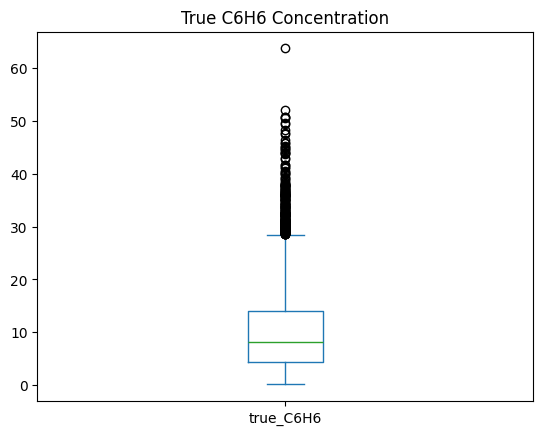

In [ ]:
air_qu.true_C6H6.plot.box(title = "True C6H6 Concentration")

The boxplot of C6H6 concentration values shows a range of values from around zero up to over 60, with a substantial number of high outliers, which is consistent with the numeric summary indicating a right-skewed data set. The median of about 8 (the middle value in the data set with half the values above and half below) is visible at the green line. The numbers above the median are more spread out than the numbers below.

[Text(0.5, 0, 'C6H6 Concentration (micrograms per cubic meter)')]

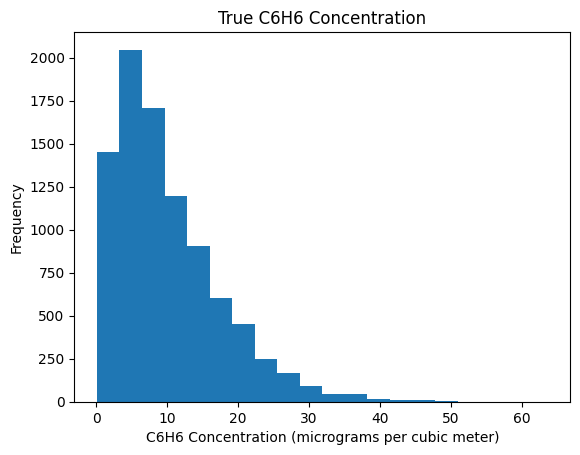

In [ ]:
air_qu.true_C6H6.plot.hist(bins = 20,
    title = "True C6H6 Concentration")\
    .set(xlabel = "C6H6 Concentration (micrograms per cubic meter)")

The histogram of true C6H6 concentration also reveals a right-skewed data set with the upper half of numbers more spread out than the lower half. The highest frequnecy of occurrence is at and below ten.

## Predictor Variables: Sensor Readings for Environmental Pollutants

In [ ]:
air_qu[["CO", "NMHC", "NOx", "NO2", "O3"]].describe()[1:].round(2)

,CO,NMHC,NOx,NO2,O3
mean,1099.83,939.15,835.49,1456.26,1022.91
std,217.08,266.83,256.82,346.21,398.48
min,647.00,383.00,322.00,551.00,221.00
25%,937.00,734.50,658.00,1227.00,731.50
50%,1063.00,909.00,806.00,1463.00,963.00
75%,1231.00,1116.00,969.50,1674.00,1273.50
max,2040.00,2214.00,2683.00,2775.00,2523.00


The mean hourly sensor readings for environmental pollutants range from 835 to 1456, with standard deviations less than half the mean values, so less variable than the tru C6H6 concentration values. NO2 is the highest, with mean value around 1456 and standard deviation around 346. NO2 is the lowest with mean value around 835 with standard deviation about 257. Like the true C6H6 concentration values, the sensor readings seem right-skewed. This is clear because the medians are smaller than the means, except for NO2, and because the spreads from 75th percentile to maximum are comparatively large. The CO sensor readings have the lowest standard deviation and the lowest range (maximum value minus minimum value) of all the sensor readings, so it seems to be the least variable sensor. NOx has the next lowest standard deviation, but is very close to the next highest standard deviation value which is NMHC.

[Text(0, 0.5, 'Sensor-Read Concentration')]

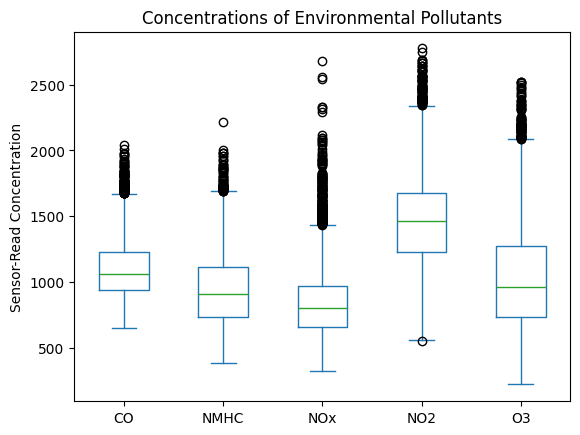

In [ ]:
air_qu[["CO", "NMHC", "NOx", "NO2","O3"]].plot.box(label = "CO",
                   title = "Concentrations of Environmental Pollutants")\
                   .set(ylabel = "Sensor-Read Concentration")

There are a lot of high outliers visible on the boxplots of the sensor readings and clear overlap between the variables, with NO2 showing central tendency higher than the other sensors. The CO sensor box shows less spread and fewer outliers than the other sensors, again indicating lower variability.

Text(0.5, 0, 'Sensor-Read Concentration')

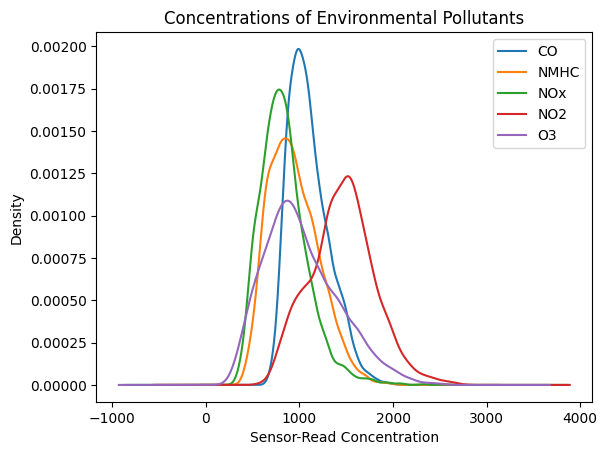

In [ ]:
air_qu["CO"].plot.density(title="Concentrations of Environmental Pollutants",
                          label = "CO")
air_qu["NMHC"].plot.density(label = "NMHC")
air_qu["NOx"].plot.density(label = "NOx")
air_qu["NO2"].plot.density(label = "NO2")
air_qu["O3"].plot.density(label = "O3")
plt.legend()
plt.xlabel("Sensor-Read Concentration")

The histogram also shows NO2 as the highest sensor value and NOx as (barely) the lowest value. All pollutants except for NO2 are at least a little right-skewed. There is clear overlap between the variables, and the CO sensor curve is narrowest from left to right, again indicating lower variability, followed by NOx sensor and NMHC sensor.

## Predictor Variables: Environment

In [ ]:
air_qu[["temp", "rel_hum", "abs_hum"]].describe()[1:]

,temp,rel_hum,abs_hum
mean,18.317829,49.234201,1.025530
std,8.832116,17.316892,0.403813
min,-1.900000,9.200000,0.184700
25%,11.800000,35.800000,0.736800
50%,17.800000,49.600000,0.995400
75%,24.400000,62.500000,1.313700
max,44.600000,88.700000,2.231000


The temperature ranges from -1.9 to 44.6 C, with a mean of 18.3, and a standard deviation less than half the mean at 8.8. The relative humidity ranges from 9.2 % to 88.7%, with mean 49.2% and standard deviation well less than half that at 17.3%. The absolute humidity ranges from 0.2 to 2.2 with a mean of 1.03 and standard deviation less than half the mean at 0.4. This summary indicates the variability and central tendency of the weather conditions at the study site.

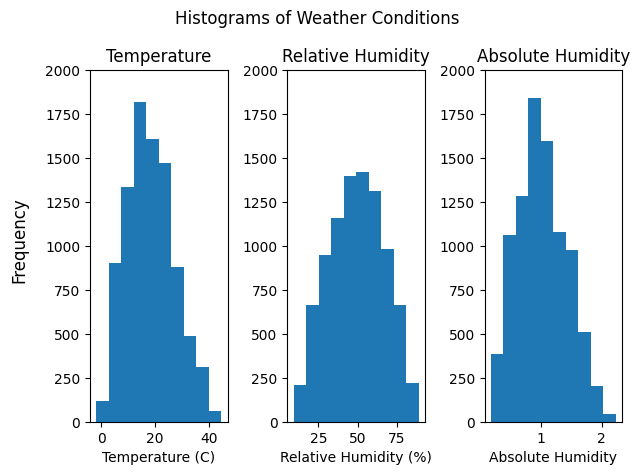

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.suptitle("Histograms of Weather Conditions")
fig.supylabel("Frequency")

ax[0].hist(air_qu.temp); ax[0].set_title("Temperature")
ax[0].set_xlabel("Temperature (C)")
ax[0].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[1].hist(air_qu.rel_hum); ax[1].set_title("Relative Humidity")
ax[1].set_xlabel("Relative Humidity (%)")
ax[1].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[2].hist(air_qu.abs_hum); ax[2].set_title("Absolute Humidity")
ax[2].set_xlabel("Absolute Humidity")
ax[2].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

fig.tight_layout()


The distributions, or frequency of occurrence of the environmental factors are pictured in the histograms above. They all look somewhat normal, with temperature and absolute humidity a bit right-skewed.

# Multivariate Summaries

## True C6H6 and Sensor Readings

### Correlation coefficients between the true C6H6 concentration and sensor readings for environmental pollutants

In [ ]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3"]].corr().iloc[0, range(1, 6)]

Correlation Coefficicients


,true_C6H6
CO,0.883795
NMHC,0.981950
NOx,-0.735744
NO2,0.765731
O3,0.865689


Correlation coefficeints are a measure of linear relationship between two numeric variables, ranging from -1 to 1. Negative correlation indicates inverse relationship, values near zero indicate no relationship, and positive values indicate correlation. There is a strong positive correlation between true C6H6 conctration and CO, NMHC, NO2, and O3 sensor readings, ranging from 0.7657 up to 0.9820. The strongest correlation is to NMHC at 0.9820, and next strongest to CO at 0.8838. There is also a strong inverse correlation between true C6H6 concentration and NOx, at -0.7357.

### Scatter plots of true C6H6 vs. environmental pollutant sensor readings

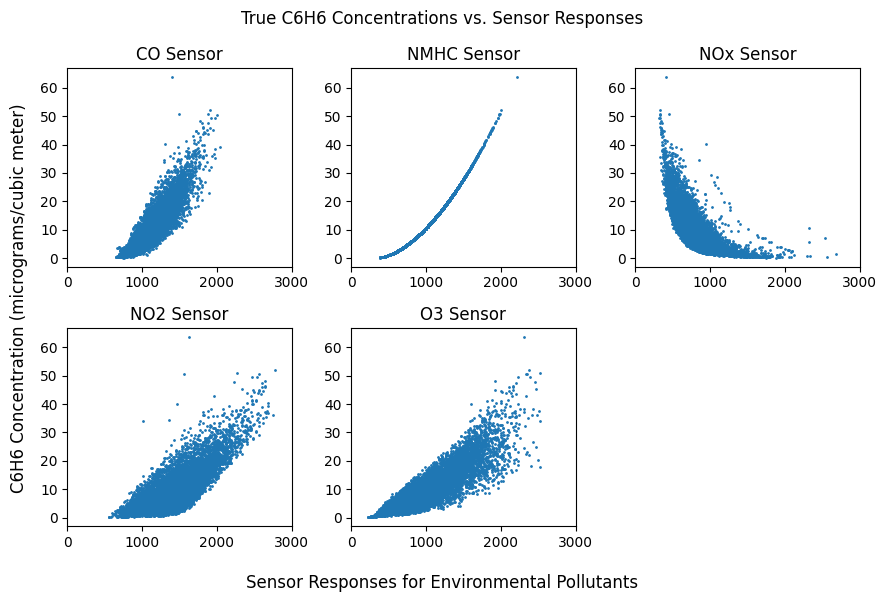

In [ ]:
x1, x2, x3, x4, x5 = air_qu.CO, air_qu.NMHC, air_qu.NOx, air_qu.NO2, air_qu.O3
y = air_qu.true_C6H6

fig, (ax1, ax2) = plt.subplots(2,3, figsize = (9,6))
fig.suptitle("True C6H6 Concentrations vs. Sensor Responses")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
fig.supxlabel("Sensor Responses for Environmental Pollutants")

ax1[0].scatter(x1, y, s = 1); ax1[0].set_title("CO Sensor")
ax1[0].set_xticks([0, 1000, 2000, 3000])

ax1[1].scatter(x2, y, s = 1); ax1[1].set_title("NMHC Sensor")
ax1[1].set_xticks([0, 1000, 2000, 3000])

ax1[2].scatter(x3, y, s = 1); ax1[2].set_title("NOx Sensor")
ax1[2].set_xticks([0, 1000, 2000, 3000])

ax2[0].scatter(x4, y, s = 1); ax2[0].set_title("NO2 Sensor")
ax2[0].set_xticks([0, 1000, 2000, 3000])

ax2[1].scatter(x5, y, s = 1); ax2[1].set_title("O3 Sensor")
ax2[1].set_xticks([0, 1000, 2000, 3000])

ax2[2].remove()

fig.tight_layout()

The strong correlations indicated by the correlation coefficients calculated in the table above are clear in the scatter plots, most positive (going from bottom left to top right for a positive slope) and one negative (NOx sensor; going from top left to bottom right for a negative slope). The nearly linear shape of the NMHC scatter plot confirms the correlation coefficient of nearly 1. The data points on the CO sensor scatter plot are more narrowly and linearly shaped than the data points on the NOx, NO2, and O3 plots, confirming the second highest correlation coefficient. The data points for the NOx sensor are shaped very differently from the others, in addtion to being an inverse rather tahn a positive correlation.

## True C6H6, Sensor Readings, and Sensor Life

Sensor_life is a categorical variable based on the number of months in service for the sensor. According to the [journal article provided with the data](https://www.semanticscholar.org/paper/On-field-calibration-of-an-electronic-nose-for-in-Vito-Massera/a90a54a39ff934772df57771a0012981f355949d), the expected operational lifespan for the sensors is 12 months. Sensor_life has two categories, either in_range (the first 12 months) or out_of_range (the final two months).

### Mean and Standard Deviation of True C6H6 Grouped by Sensor Life

In [ ]:
air_qu.groupby("sensor_life", observed = True).\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))


,mean_C6H6,std_C6H6
sensor_life,,
in_range,10.268129,7.508301
out_of_range,8.263855,6.580697


The mean of 10.268 and standard deviation of 7.508 for C6H6 concentration for in-range sensor values closely reflect the overall C6H6 concentration mean of 10.08 and standard deviation of 7.45. The out-of-range sensor summaries for C6H6 concentration are a little lower at mean 8.264 and standard deviation 6.581 The in-range sensor values' mean and standard deviation are higher than the out-of-range mean, by about 2 and 1, respectively. Perhaps the values go down as the sensors deteriorate, but these are largely overlapping values with standard deviations well over half the mean values. The out-or-range values are also a smaller portion of the data, at 2 out of 12 months of the readings.

### Correlation coefficients between true C6H6 concentration and sensor readings for environmental pollutants grouped by *sensor_life*

In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","sensor_life"]]\
    .groupby("sensor_life", observed = True).corr()["true_C6H6"].unstack()

Correlation Coefficients


,true_C6H6,CO,NMHC,NOx,NO2,O3
sensor_life,,,,,,
in_range,1.0,0.888218,0.981925,-0.750423,0.766235,0.870896
out_of_range,1.0,0.912919,0.983735,-0.813664,0.846461,0.867681


 The magnitude of the correlation coefficients between true C6H6 and the sensor readings are similar to the overall correlation coefficients for these variables. They grew a just a bit stronger for the out-of range values except O3, which decreased a tad. The NO2 coefficient increased the most followed by the NOx coefficient. The magnitude of the correlations was still very strong for both in-range and out-of-range sensors, with NMHC showing the strongest correlation to C6H6 concentration, followed by CO and O3 for both sensor groups. The shift in correaltion coefficient for the out-of-range sensors coule be due to decreased sensor capability.

### Scatter plots of true C6H6 vs. sensor readings for in_range and out_of_range sensor_life

Make the scatter plots using the long data formatted data frame.

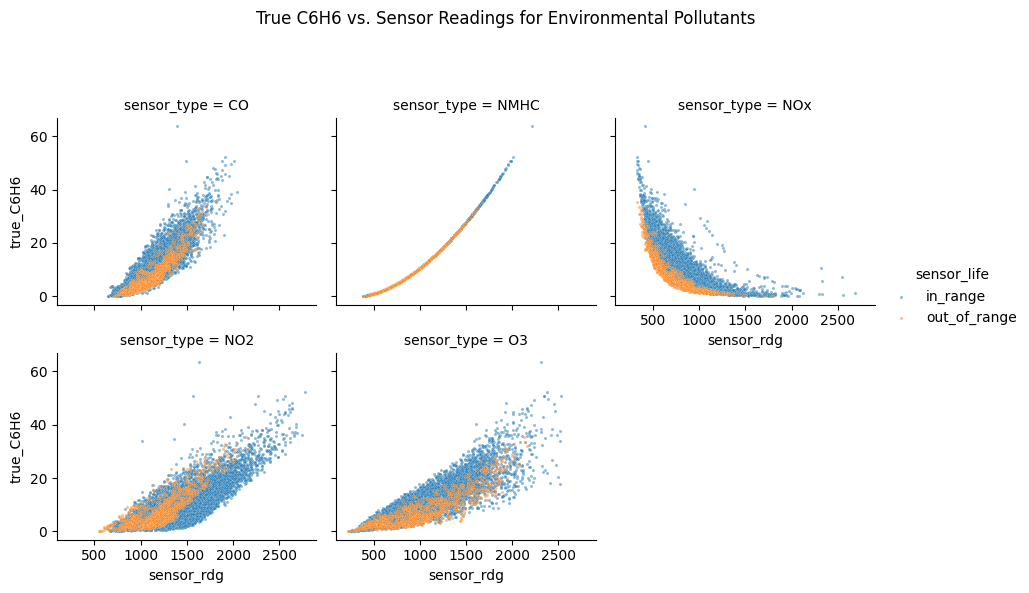

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "sensor_life",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5, s = 5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for Environmental Pollutants")
plt.subplots_adjust(top=0.8) #title spacing




The true C6H6 concentration vs. sensor readings scatter plots show narrower bands of plotted points for out-of-range than for in-range sensor readings for CO, NOx, NO2, and O3. The NMHC plot is again shaped much differently, almost in a stratight line. For all sensors, the C6H6 concentration values and the sensor readings do not range as high for the out-of-range sensors as they dof or the in-range sensors. This could indicate decreased sensor capability to read the full range of values.

## True C6H6 and Weather Conditions

### Means and Standard Deviations of True C6H6 by Weather Condition Levels

In [ ]:
air_qu.groupby("temp_label", observed = True).\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))


,mean_C6H6,std_C6H6
temp_label,,
High Temp,11.501027,7.412142
Low Temp,8.791456,7.247147


In comparison to the overall means for C6H6 conctration, the high-temperature mean of 11.5o1 is higher than the overall C6H6 mean of 10.08, and the low-temperature C6H6 mean of 8.791 is lower than the overall mean of 10.08. The standard deviations are similar (overall C6H6 std = 7.45; low-temp C6H6 std = 7.247, high-temp C6H6 std = 7.412). The mean C6H6 for low temperatures is about two degrees lower than the mean C6H6 for high temperatures, and the standard deviation is about the same for both. The standard devivations are well over half the mean in both cases, so these are largely overlapping numbers for high- and low-temperature values. The differences posisbly indicate higher C6H6 concentrations with higher temperatures.

In [ ]:
air_qu.groupby("rh_label", observed = True).\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))

,mean_C6H6,std_C6H6
rh_label,,
High RH,9.862769,8.102369
Low RH,10.309655,6.706436


The C6H6 mean for low relative humidity (10.310) is about half a percent higher than for high relative humidity (9.863), so an inverse relationship. THe overall C6H6 mean (10.08) is between the high relative humidity and low relative humidity means. Similar to the temperature results, the means are close and the standard deviations are well over half the mean values, so largely overlapping values again. The standard deviation is lower for the low relative humidity values (6.706) than for the high relative humidity values (8.102) by over ten percent. The overall C6H6 concentration standard deviation again falls between the high and low relative humidity C6H6 standard deviations.

In [ ]:
air_qu.groupby("ah_label", observed = True).\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))

,mean_C6H6,std_C6H6
ah_label,,
High AH,11.137390,7.725130
Low AH,9.155978,7.071081


The C6H6 means for absolute humidity resemble the temperature results. The high absolute humidity C6H6 mean concentration (11.137) is higher than the low absolute humidity C6H6 mean (9.156), and the overall C6H6 mean (10.08) is between them. The C6H6 mean for high absolute humidity is about two higher than for low humidity. Once again, the standard deviations are well over half the mean values indicating largely overlapping groups. The difference in means could indicate that higher absolute humidity values correspond to higher C6H6 concentrations.

### Correlation coefficients between true C6H6 concentration and the weather  conditions

In [ ]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "temp", "rel_hum", "abs_hum"]].corr().iloc[0, range(1, 4)]

Correlation Coefficicients


,true_C6H6
temp,0.198956
rel_hum,-0.061681
abs_hum,0.167972


The correlation coefficients, which are calculated for all data points without consideration to time, do not indicate a relationship between weather conditions and true C6H6 values. Both temperature and absolute humidity show a veru low but positive corralation to C6H6 concentration (0.1990 and 0.1680, respectively), and relative humidity shows an even lower magnitude but negative or inverse correlation to C6H6 concetration (-0.0617).

### Scatter Plots of True C6H6 and Weather Conditions

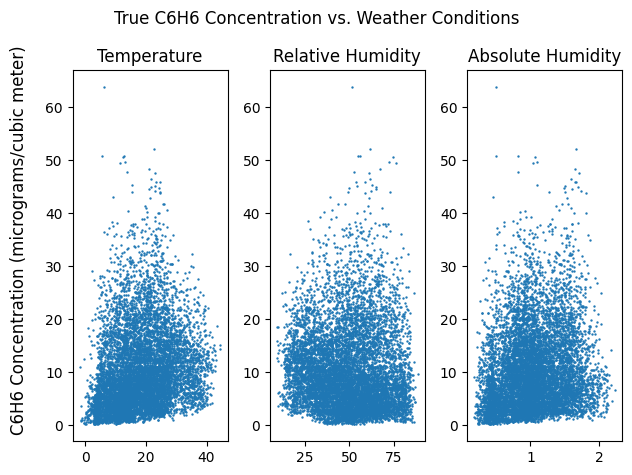

In [ ]:
x1, x2, x3 = air_qu.temp, air_qu.rel_hum, air_qu.abs_hum
y = air_qu.true_C6H6

fig, ax = plt.subplots(1,3)
fig.suptitle("True C6H6 Concentration vs. Weather Conditions")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")

ax[0].scatter(x1, y, s = 0.5); ax[0].set_title("Temperature")
ax[1].scatter(x2, y, s = 0.5); ax[1].set_title("Relative Humidity")
ax[2].scatter(x3, y, s = 0.5); ax[2].set_title("Absolute Humidity")

fig.tight_layout()

The scatter plots above back up the findings from the correlation coefficients. No relationship between true C6H6 concentration and either temperature, relative humidity, or absolute humidity is apparent in these graphs. THe data points are all over the place, with higher frequency at lower values of C6H6 conctration. Once again, the relationship considered here is without respect to time.

## True C6H6, Sensor Readings, and Weather Conditions

### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low temperature



In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","temp_label"]]\
    .groupby("temp_label", observed = True).corr()["true_C6H6"].unstack()

Correlation Coefficients


,true_C6H6,CO,NMHC,NOx,NO2,O3
temp_label,,,,,,
High Temp,1.0,0.897714,0.985597,-0.779765,0.856662,0.894023
Low Temp,1.0,0.893189,0.980114,-0.717671,0.752783,0.876572


The correlation coefficients generally differed very slightly between low and high temperature values, with low temperature showing smaller magnitudes than high temperature. It was most noticeable with NO2, which decreased in magnitude by more than 10%, and NOx, which decreased in magnitude more than 5%. The correlation was still very strong for both high-temperature and low-temperature groupings for all sensor types, and the C6H6 correlation to NMHC is again the highest, followed by CO, then O3.

### Scatter plots of true C6H6 vs. sensor readings for high and low temps

Create the scatter plots with the long-format data frame.

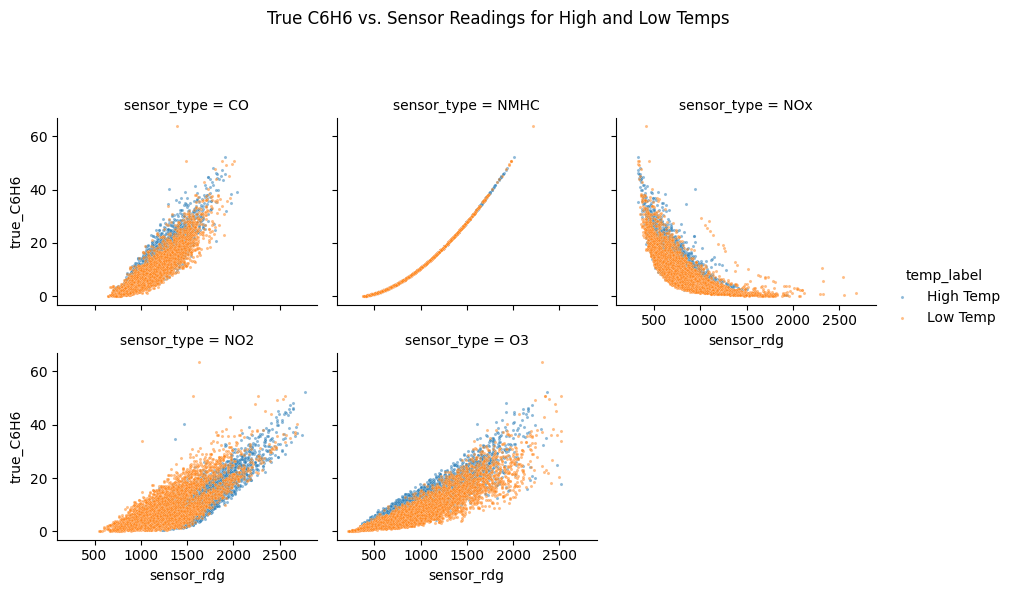

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "temp_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5, s = 5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Temps")
plt.subplots_adjust(top=0.8) #title spacing

The high-temperature and low-temperature points on the scatter plots for the true C6H6 conctrations vs. all five of the environmental pollutant readings overlap almost completely, with some extended coverage by high-temperature data points. The NO2 sensor shows some high_tempeerature data points with less overlap on the high end of its sensor reading range, and the O3 sensor show high-temperature data points without overlap on the higher side of C6H6 concntration values.

### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low relative humidity

In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","rh_label"]]\
    .groupby("rh_label", observed = True).corr()["true_C6H6"].unstack()

Correlation Coefficients


,true_C6H6,CO,NMHC,NOx,NO2,O3
rh_label,,,,,,
High RH,1.0,0.906049,0.982115,-0.748358,0.790484,0.879797
Low RH,1.0,0.874729,0.982895,-0.726775,0.751992,0.877138


The correaltion coefficients between C6H6 and sensor readings for high and low relative humidity are very close to each other and very close to the overall correlation coefficients between C6H6 and the snepr readings. The correlation coefficients bewteen C6H6 and high and low relative humidity show slightly lower magnitudes for low relative humidity values than for high relative humidity. The differences are less than 5%, with the least difference for the NMHC sensor and the most difference for the CO and NO2 sensors. The correlation was still very strong for all sensor types at both high and low relative humidity.

### Scatter plots of true C6H6 vs. sensor readings grouped for high and low relative humidity

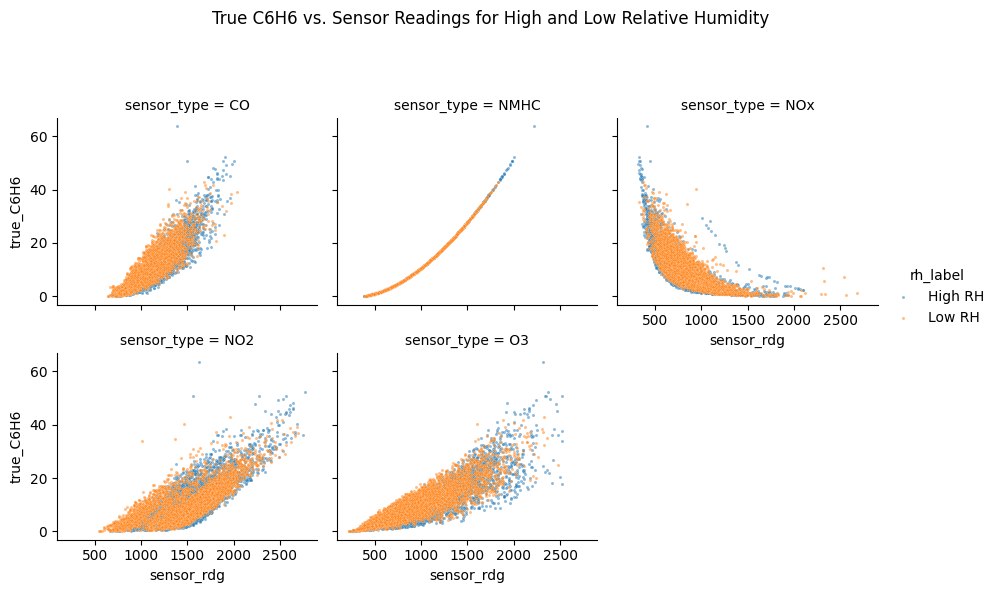

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "rh_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5, s = 5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Relative Humidity")
plt.subplots_adjust(top=0.8) #title spacing

The data points for high and low relative humidity on these scatter plots show almost complete overlap, more so than for the high- and low-temperature plots, corresponding to the smaller differences in calculated correlation coefficients for low and high humidity values compared to low and high temperature values. The C6H6 concentration values do not range quite as high for low relative humidity as they do for high relative humidity.

### Correlation coefficients between true C6H6 concentration and sensor readings for high and low absolute humidity

In [ ]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","ah_label"]]\
    .groupby("ah_label", observed = True).corr()["true_C6H6"].unstack()

Correlation Coefficients


,true_C6H6,CO,NMHC,NOx,NO2,O3
ah_label,,,,,,
High AH,1.0,0.908840,0.984907,-0.793286,0.879506,0.899364
Low AH,1.0,0.867022,0.980702,-0.704256,0.773047,0.854401


The correlation values are all of lower magnitude for low absolute humidity observations than for high absolute humidity observations. The NO2 and NOx sensors again stand out, as with the low- and high- temperature observations, with differences of over 10% and over 5% respectively. NMHC showed the least difference. The pattern of difference for correlation coefficients between true C6H6 concentration and sensor readings for high- and low- absolute humidity follow the same pattern as for high- and low- temperature. Once again, the coefficients are similar to each other and to the overall correaltion coefficients, and the correlation is strong.

### Scatter plots of true C6H6 vs. sensor readings for high and low absolute humidity

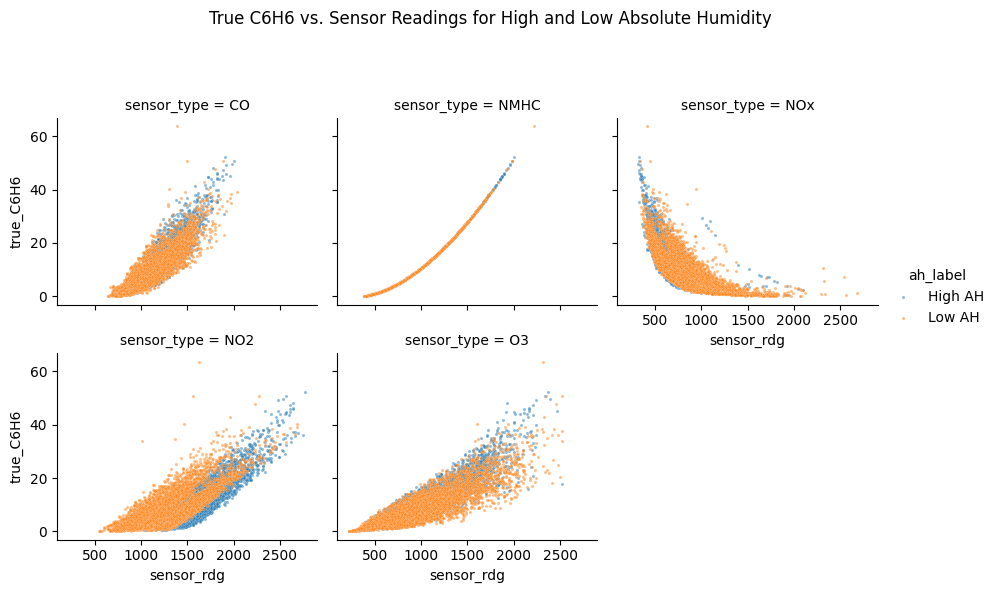

In [ ]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "ah_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5, s = 5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Absolute Humidity")
plt.subplots_adjust(top=0.8) #title spacing

There is much overlap between the high and low absolute value observations, with NO2 sensor readings standing out for less overlap than the others. These plots look similar to the corresponding high- and low-temperature plots.

## Time Series Summaries

### Over the Time Span of the Study

#### Table of Means for True C6H6 and Sensor Readings By Month of the Study

In [ ]:
air_qu.groupby("month_year", observed = True).mean(["true_C6H6"])[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3"]]

,true_C6H6,CO,NMHC,NOx,NO2,O3
month_year,,,,,,
3_2004,9.932745,1222.819608,935.643137,1029.172549,1572.072549,1027.494118
4_2004,10.389177,1162.849928,949.210678,935.629149,1610.744589,1004.051948
5_2004,10.219041,1076.664384,951.094521,947.494521,1601.101370,928.206849
6_2004,10.595748,1020.793255,966.379765,900.467742,1722.376833,937.611437
7_2004,10.599462,1046.434724,971.480485,804.886945,1643.823688,994.452221
8_2004,6.993669,981.060432,838.484892,835.851799,1580.941007,777.385612
9_2004,11.554558,1081.561254,993.508547,810.410256,1546.727920,1036.431624
10_2004,13.525303,1184.913863,1058.433378,688.139973,1636.950202,1163.850606
11_2004,12.511806,1132.148611,1011.201389,789.880556,1372.234722,1171.354167


The table shows the mean monthly values for true C6H6 concentration and all sensor readings over the course of the study. Looking from the top of each column to the bottom, it can be seen that true C6H6 and all sensor readings began the study in March, 2004, with higher values than recorded at the end of the study in April, 2005, with varying ups and downs in between.

#### True C6H6 Concentration Over the Course of the Study

Text(0.5, 1.0, 'True C6H6 Concentration Over Time (Weekly Summaries)')

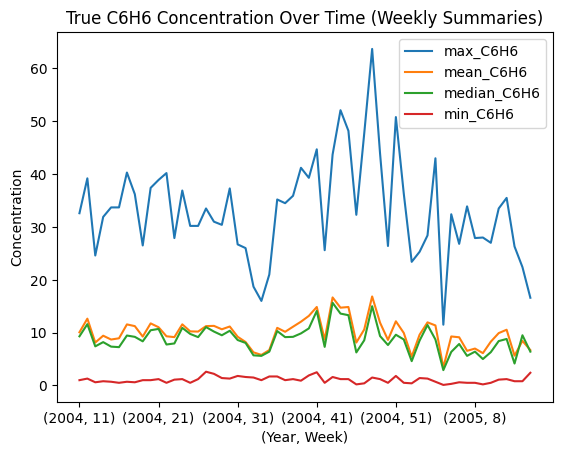

In [ ]:
air_qu.groupby(["year", "week"], observed = True).\
    agg(max_C6H6 = ("true_C6H6", "max"),
        mean_C6H6 = ("true_C6H6", "mean"),
        median_C6H6 = ("true_C6H6", "median"),
        min_C6H6 = ("true_C6H6", "min"))\
    .plot(kind = "line")
plt.xlabel("(Year, Week)")
plt.ylabel("Concentration")
plt.title("True C6H6 Concentration Over Time (Weekly Summaries)")

Over the course of the study, the center values of mean and median can be seen fluctuating around the mean C6H6 value of 10. The green median line is seen a bit below the yellow mean line, corresponding to the median value of 8. The much deeper fluctuations of the monthly maximum values are visible above in the blue line, and the steady, red, minimum line is at the bottom near zero.
The center values for the mean and median begin bouncing up and down more around the mid-point of the study, around the 35th week. The maximum values begin bouncing around even more at the same time.

#### Sensor Readings Over the Course of the Study

Text(0.5, 1.0, 'Sensor Readings Over Time (Monthly Averages)')

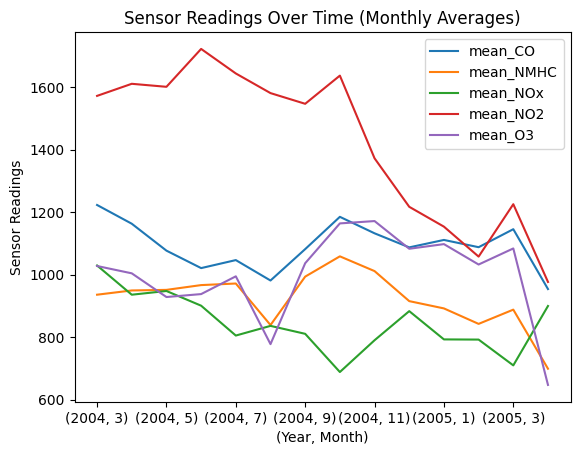

In [ ]:
air_qu.groupby(["year", "month"]).\
    agg(mean_CO = ("CO", "mean"),
        mean_NMHC = ("NMHC", "mean"),
        mean_NOx = ("NOx", "mean"),
        mean_NO2 = ("NO2", "mean"),
        mean_O3 = ("O3", "mean"))\
    .plot(kind = "line")
plt.xlabel("(Year, Month)")
plt.ylabel("Sensor Readings")
plt.title("Sensor Readings Over Time (Monthly Averages)")

The trajectories of the sensor readings over the course of the study can be seen in this graph. The monthly averages for CO, NMHC, NOx, and O3 are of simlar values, often overlapping. The red NO2 line starts clearly above the others, but begins dropping in value around November, 2004, meeting the others about January, 2005. Also in November, 2004, purple O3 line jumps up quite a bit until dropping back down in the final month of the study, April, 2005. These shifts could be related to pollutant- or sensor-specific sensitivity to winter weather conditions, aging sensors, or both.

#### True C6H6 Concentration and Weather Conditions

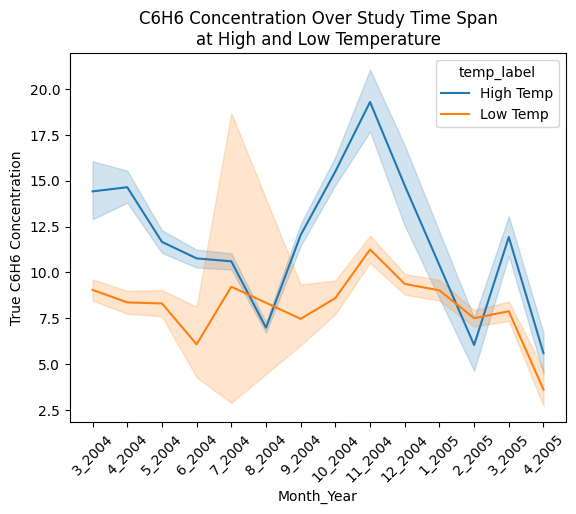

In [ ]:
ax =  sns.lineplot(data = air_qu, x = "month_year", y = "true_C6H6", hue = "temp_label")
ax.set(xlabel = "Month_Year", ylabel = "True C6H6 Concentration")
ax.set_title("C6H6 Concentration Over Study Time Span\nat High and Low Temperature")
ax.tick_params(axis='x', rotation=45)

The high-temperature C6H6 monthly average is generally higher than the low-temperature average over the course of the study, with exceptions in August, 2004, and February, 2005. Both groups peak in November, 2004. We calculated earlier that the high-temperature C6H6 mean is higher than the low-temperature mean, but both are highly variable. That seems evident in this graph. Perhaps this graph is showing some of the variability increase revealed mid-study in the plot of C6H6 concentration over the course of the study shown above.

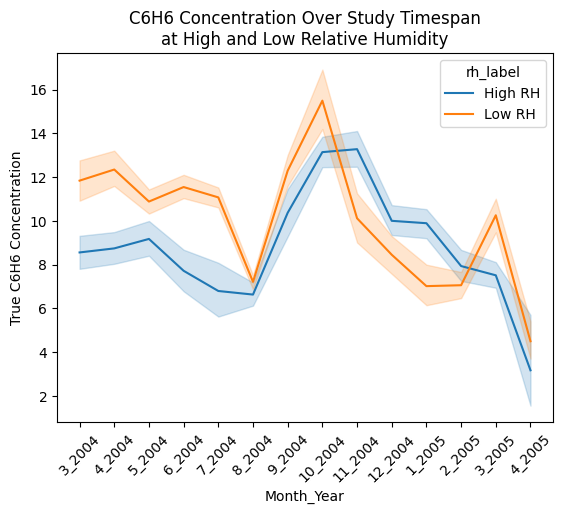

In [ ]:
ax =  sns.lineplot(data = air_qu, x = "month_year", y = "true_C6H6", hue = "rh_label")
ax.set(xlabel = "Month_Year", ylabel = "True C6H6 Concentration")
ax.set_title("C6H6 Concentration Over Study Time Span\nat High and Low Relative Humidity")
ax.tick_params(axis='x', rotation=45)

In contrast to the high- and low-temperature plot for C6H6 just above, the high relative humidity monthly average for C6H6 was usually, but not always, lower than the low-relative humidity monthly averages. The average value the high relative humidity mean C6H6 was also a bit lower than for the low relative humidity mean. The high- and low- relative humidity monthly averages overlap more and have more similar trajectories than the high- and low-temperature monthly averages.

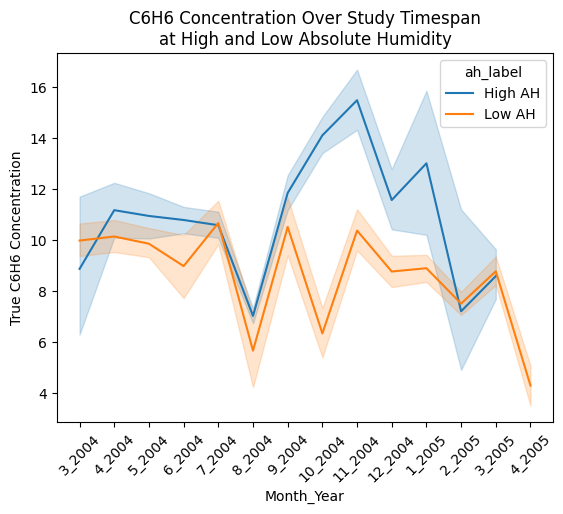

In [ ]:
ax =  sns.lineplot(data = air_qu, x = "month_year", y = "true_C6H6", hue = "ah_label")
ax.set( xlabel = "Month_Year", ylabel = "True C6H6 Concentration")
ax.set_title("C6H6 Concentration Over Study Time Span\nat High and Low Absolute Humidity")
ax.tick_params(axis='x', rotation=45)

The high absolute humidity monthly average C6H6 concentration is generally higher than the low absolute humidity monthly mean, but not always. There's a greater difference between the two clear in October, November, and December, 2004.

### Over the Hours of the Day

#### Table of Means for True C6H6 and Sensor Readings By Hour of Day

In [ ]:
air_qu.groupby("hour").mean(["true_C6H6"])[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3"]]

,true_C6H6,CO,NMHC,NOx,NO2,O3
hour,,,,,,
0,7.684140,1065.008065,869.311828,848.615591,1387.413978,999.086022
1,5.991711,1003.823529,795.973262,912.919786,1329.358289,902.911765
2,4.379467,943.925333,715.544000,1002.032000,1274.546667,802.816000
3,3.379255,904.082447,658.513298,1081.172872,1238.138298,733.337766
4,2.916711,884.766578,630.899204,1120.830239,1221.496021,700.159151
5,3.068435,892.095491,641.435013,1107.100796,1231.594164,713.312997
6,4.756117,953.122340,731.231383,999.332447,1301.877660,814.045213
7,10.398936,1113.428191,944.114362,829.787234,1508.906915,1048.103723
8,15.894149,1238.303191,1130.505319,701.486702,1692.119681,1261.603723


The table above shows the hourly average C6H6 concentration and environmental pollutant sensor readings over the course of 24 hours. All columns except the NOx sensor show a pattern of decreasing values from midnight until the early morning, then increasing with morning commuter traffic, decreasing again and staying low for mid-day before increasing for late-afternoon and evening commuter traffic and then tapering off as midnight approaches. NOx follows a some what opposite pattern.

#### C6H6 Concentration Over the Hours of the Day

Text(0.5, 1.0, 'True C6H6 Concentration Over Hours of the Day (Hourly Summaries)')

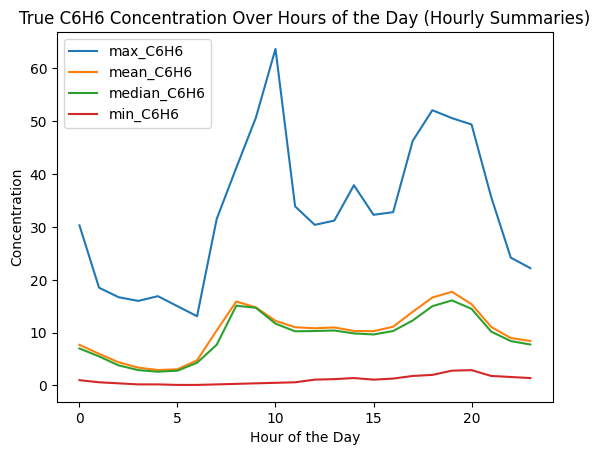

In [ ]:
air_qu.groupby("hour").\
    agg(max_C6H6 = ("true_C6H6", "max"),
        mean_C6H6 = ("true_C6H6", "mean"),
        median_C6H6 = ("true_C6H6", "median"),
        min_C6H6 = ("true_C6H6", "min"))\
    .plot(kind = "line")
plt.xlabel("Hour of the Day")
plt.ylabel("Concentration")
plt.title("True C6H6 Concentration Over Hours of the Day (Hourly Summary)")

Over the course of a day, the hourly average C6H6 concentration starts comparatively low at midnight, decreases through the very early morning to its lowest daily point, increases again and peaks in the early morning, is lower through mid-day, peaks again in the late afternoon/evening before descending until midnight. This perfectly corresponds to commuter traffic patterns, with highest C6H6 concentrations occurring at peak commuter traffic times.

#### Environmental Pollutant Sensor Readings Over the Hours of the Day

Text(0.5, 1.0, 'Sensor Readings Over Hours of the Day (Hourly Means)')

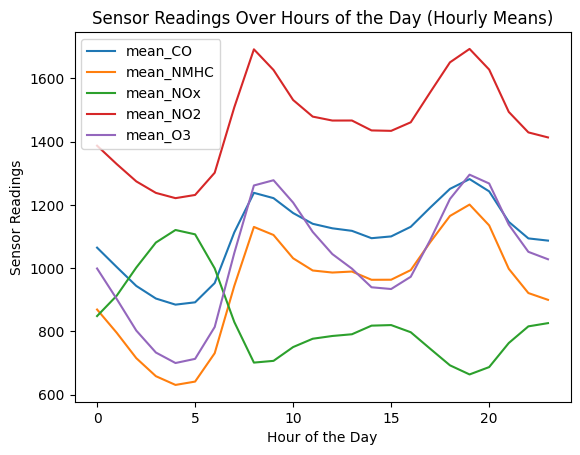

In [ ]:
air_qu.groupby("hour").\
    agg(mean_CO = ("CO", "mean"),
        mean_NMHC = ("NMHC", "mean"),
        mean_NOx = ("NOx", "mean"),
        mean_NO2 = ("NO2", "mean"),
        mean_O3 = ("O3", "mean"))\
    .plot(kind = "line")
plt.xlabel("Hour of the Day")
plt.ylabel("Sensor Readings")
plt.title("Sensor Readings Over Hours of the Day (Hourly Means)")

The hourly average C0, NMHC, O3, and NOx sensor readings all have similar values over the course of the day. The NO2 hourly average sensor values are higher. The CO, NMHC, NO2, and O3 hourly average values follow a similar trajectory to each other and to the C6H6 concentration over the course of the day. The NOx sensor reading trajectory is inverted from the rest. The common pattern, excluding NOx, is comparatively low at midnight, decreasing through the very early morning to the lowest daily point, increasing again and peaking in the early mornig, lowering through mid-day, then increasing and peaking again in the late afternoon/evening before descending until midnight. This pattern again perfectly matches increased sensor readings with high commuter traffic times. The NOx sensor follows an opposite pattern.

#### C6H6 Concentration and Weather Conditions

Text(0, 0.5, 'True C6H6 Concentration')

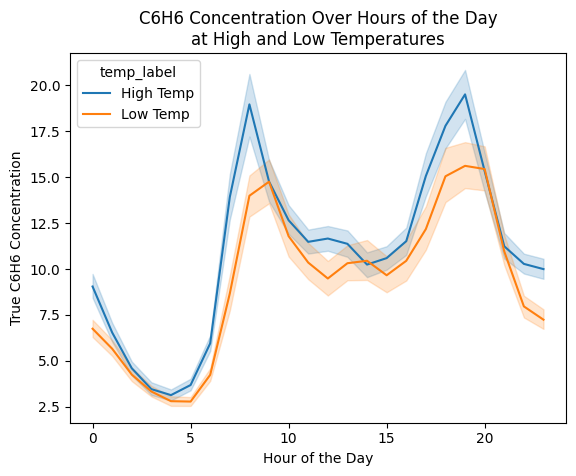

In [ ]:
sns.lineplot(data = air_qu, x = "hour", y = "true_C6H6", hue = "temp_label")
plt.title("C6H6 Concentration Over Hours of the Day\nat High and Low Temperatures")
plt.xlabel("Hour of the Day")
plt.ylabel("True C6H6 Concentration")

The shapes of the plots for C6H6 concentration over the hours of the day grouped by high and low temperatures are very similar to each other, and similar to the other sensor reading plots over the course of a day - very low very early in the morning, peaking later in the morning, lower again through the afternoon, peeking again in the late afternoon/evening, and low again late at night. The high-temperature average is just a shade higher than the low-temperature average, with a bigger difference at the morning and evening peaks. Again, the shape, peaks, and troughs correspond to the commuter traffic patterns with high traffic corresponding to high C6H6 density. Higher temperatures seem to produce higher C6H6 concentrations.

Text(0, 0.5, 'True C6H6 Concentration')

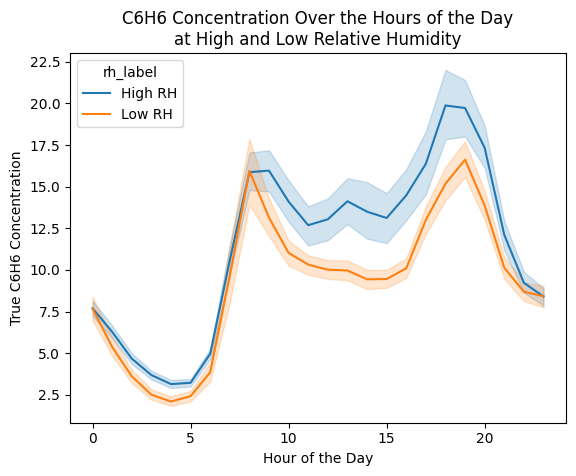

In [ ]:
sns.lineplot(data = air_qu, x = "hour", y = "true_C6H6", hue = "rh_label")
plt.title("C6H6 Concentration Over the Hours of the Day\nat High and \
Low Relative Humidity")
plt.xlabel("Hour of the Day")
plt.ylabel("True C6H6 Concentration")

The shapes of the plots for C6H6 concentration over the hours of the day grouped by high and low relative humidity are similar to each other, and similar to the majority of the sensor reading plots over the course of a day - very low very early in the morning, peaking later in the morning, lower again through the afternoon, peeking again in the late afternoon/evening, and low again late at night. The high and low relative humidity averages track closely together early and late in the day, with high realtive humidity usually just a shade higher, but during the afternoon trough between the peaks and at the second peak there is a bigger difference in averages with high relative humidity on top. Again, the shape, peaks, and troughs correspond to the commuter traffic patterns with high traffic times corresponding to higher C6H6 density. Higher relative humidity seems to produce higher C6H6 concntrations, especially in the afternoon when it is typically warmer.

Text(0, 0.5, 'True C6H6 Concentration')

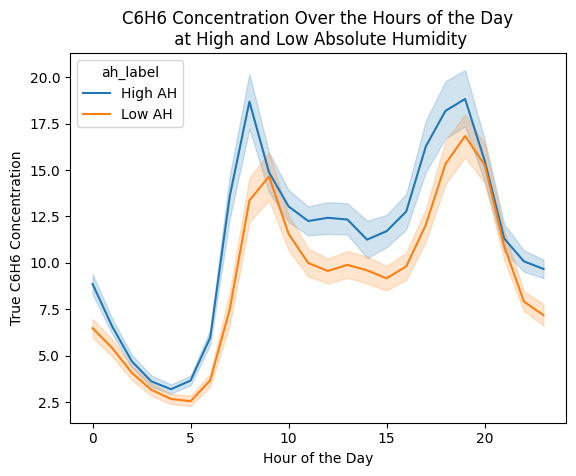

In [ ]:
sns.lineplot(data = air_qu, x = "hour", y = "true_C6H6", hue = "ah_label")
plt.title("C6H6 Concentration Over the Hours of the Day\n at High and Low \
Absolute Humidity")
plt.xlabel("Hour of the Day")
plt.ylabel("True C6H6 Concentration")

The average hourly C6H6 concentration plot for high and low absolute humidity over the course of the day also shows a trajectory consistent with commuter traffic patterns. The C6H6 concentrations peak at high traffic times in the morning and evening, are lower at lower traffic times in the afternoon, and are lowest at lowest traffic times in the early morning. The high and low relative humidity average concentrations are very similar, with high absolute humidity concentrations a little higher. Higher absolute humidity seems to produce higher C6H6 concentrations, possibly more so in the afternoon when it is warmer.

# Conclusions


*   True C6H6 concentration correlates strongly to all varieties of sensor readings. The correlation to the NOx sensor is inverse. The strongest correlations are to the NMHC readings (almost 1) and CO readings (around 0.9). The strength of the correlations was not much altered by weather conditions, although CO was affected more than NMHC.
*   The CO sensor is the least variable sensor according the the univariate analysis. This was clear in the calculated standard deviation and in the shapes of the histograms and box plots.
* The high correlation to C6H6 and the low variability make the CO sensor a good candidate for predicting true C6H6 values. The even closer correlation to NMHC is also attractive.
*   The NOx pollutant behaves differently than the others. It is negatively correlated to true C6H6 while the other pollutants are positively correlated, and it goes up and down in opposition to the others over the course of a day. The shape of C6H6-NOx is also different than the others.
*   The levels of true C6H6 and the other environmental pollutants are senstive to time of day, presumably due to commuting patterns and vehicle emissions.
*   There is not strong correlation between true C6H6 concentration and weather conditions if time is not considered.
*   There are shifts in mean values of NO2 and O3 sensor readings and variability of true C6H6 mean concentrations visible in the time series graphs over the time span of the study. This is possibly indicative of sensor deterioration.
